In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file = pd.read_csv("menthealth.csv")
file['Treatment'].value_counts()
file['Treatment'].value_counts(normalize=True)*100
#რადგან ორივე მაჩვენებელი თითქმის თანაბარია პროცენტულად, ჩვენ არ გვაქვს 'class imbalance'

Treatment
No     50.877824
Yes    49.122176
Name: proportion, dtype: float64

In [29]:
file.drop_duplicates(keep="last")

cat_cols = file.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    if file[col].isnull().sum()>0:
        imputer = SimpleImputer(strategy = "most_frequent")
        file[[col]] = imputer.fit_transform(file[[col]])


In [32]:
OH_encoder = OneHotEncoder(sparse_output=False)
encoded_file = pd.DataFrame(OH_encoder.fit_transform(file), columns = OH_encoder.get_feature_names_out(file.columns))
encoded_file.head()

,Gender_Female,Gender_Male,Country_Australia,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Canada,Country_Colombia,Country_Costa Rica,Country_Croatia,...,WorkInterest_Yes,SocialWeakness.1_Maybe,SocialWeakness.1_No,SocialWeakness.1_Yes,MentalHealthInterview_Maybe,MentalHealthInterview_No,MentalHealthInterview_Yes,CareOptions_No,CareOptions_Not sure,CareOptions_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
# print(encoded_file.columns.tolist())
corr_matrix = encoded_file.corr()
print(corr_matrix)
target_corr = corr_matrix['Treatment_Yes'].sort_values(ascending=False)
print(target_corr)

                                Gender_Female  Gender_Male  Country_Australia  \
Gender_Female                        1.000000    -1.000000           0.062817   
Gender_Male                         -1.000000     1.000000          -0.062817   
Country_Australia                    0.062817    -0.062817           1.000000   
Country_Belgium                      0.053986    -0.053986          -0.005014   
Country_Bosnia and Herzegovina      -0.010995     0.010995          -0.003533   
...                                       ...          ...                ...   
MentalHealthInterview_No             0.101686    -0.101686           0.023762   
MentalHealthInterview_Yes           -0.047094     0.047094           0.023500   
CareOptions_No                      -0.101443     0.101443          -0.036222   
CareOptions_Not sure                 0.053163    -0.053163           0.019002   
CareOptions_Yes                      0.057075    -0.057075           0.020362   

                           

In [46]:
X = encoded_file.drop(columns=["Treatment_Yes", "Treatment_No"])
y = encoded_file["Treatment_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

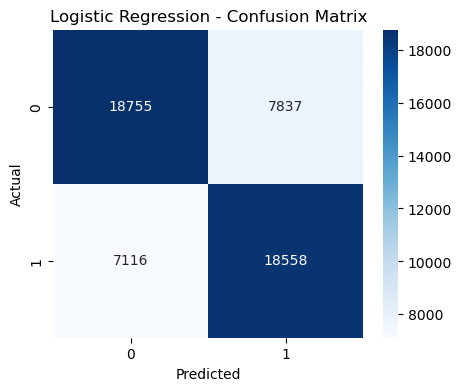

=== Logistic Regression ===
Accuracy : 0.7139
Precision: 0.7031
Recall   : 0.7228
F1-Score : 0.7128
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71     26592
         1.0       0.70      0.72      0.71     25674

    accuracy                           0.71     52266
   macro avg       0.71      0.71      0.71     52266
weighted avg       0.71      0.71      0.71     52266


########################################



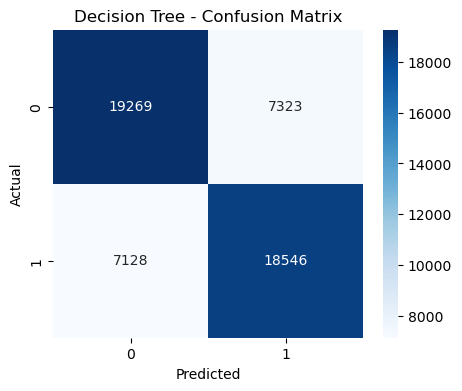

=== Decision Tree ===
Accuracy : 0.7235
Precision: 0.7169
Recall   : 0.7224
F1-Score : 0.7196
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73     26592
         1.0       0.72      0.72      0.72     25674

    accuracy                           0.72     52266
   macro avg       0.72      0.72      0.72     52266
weighted avg       0.72      0.72      0.72     52266


########################################



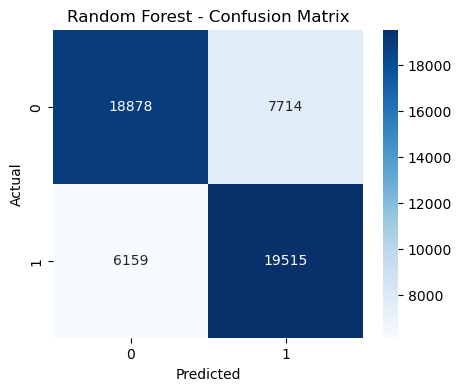

=== Random Forest ===
Accuracy : 0.7346
Precision: 0.7167
Recall   : 0.7601
F1-Score : 0.7378
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     26592
         1.0       0.72      0.76      0.74     25674

    accuracy                           0.73     52266
   macro avg       0.74      0.74      0.73     52266
weighted avg       0.74      0.73      0.73     52266


########################################



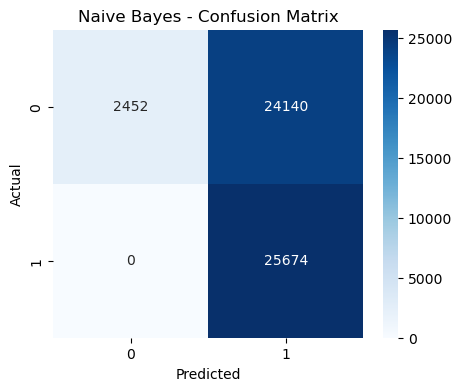

=== Naive Bayes ===
Accuracy : 0.5381
Precision: 0.5154
Recall   : 1.0000
F1-Score : 0.6802
              precision    recall  f1-score   support

         0.0       1.00      0.09      0.17     26592
         1.0       0.52      1.00      0.68     25674

    accuracy                           0.54     52266
   macro avg       0.76      0.55      0.42     52266
weighted avg       0.76      0.54      0.42     52266


########################################



In [54]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # მეტრიკები
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n" + "#"*40 + "\n")
    
    